In [18]:
%reload_kedro
metadata = catalog.load("mars_dataset_meta")
metadata

2023-01-13 12:26:23,900 - kedro.ipython - INFO - Resolved project path as: /home/daniel/git/self-supervised-learning.
To set a different path, run '%reload_kedro <project_root>'
2023-01-13 12:26:24,302 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-packages/kedro/framework/context/context.py:339: UserWarning: Credentials not found in your Kedro project config.
No files found in ['/home/daniel/git/self-supervised-learning/conf/base', '/home/daniel/git/self-supervised-learning/conf/local'] matching the glob pattern(s): ('credentials*', 'credentials*/**', '**/credentials*')
  warn(f"Credentials not found in your Kedro project config.\n{str(exc)}")

2023-01-13 12:26:24,357 - kedro.ipython - INFO - Kedro project Self-Supervised Learning
2023-01-13 12:26:24,358 - kedro.ipython - INFO - Defined global variable 'context', 'session', 'catalog' and 'pipelines'
2023-01-13 12:26:24,378 - kedro.io.data_catalog - INFO - Loading data from 'mars_dataset_me

,clip,frame_num,camera,file_id
0,0,250,0,clip0_cam0_frame250
1,0,250,1,clip0_cam1_frame250
2,0,250,2,clip0_cam2_frame250
3,0,255,0,clip0_cam0_frame255
4,0,255,1,clip0_cam1_frame255
...,...,...,...,...
430150,1246,2775,1,clip1246_cam1_frame2775
430151,1246,2775,2,clip1246_cam2_frame2775
430152,1247,225,0,clip1247_cam0_frame225
430153,1247,225,1,clip1247_cam1_frame225


2023-01-13 13:55:19,201 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":

2023-01-13 13:55:19,203 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)



clip
0       1602
1         27
2          1
3        197
4          3
        ... 
1242       1
1243       1
1244       1
1246    1461
1247       1
Length: 1225, dtype: int64

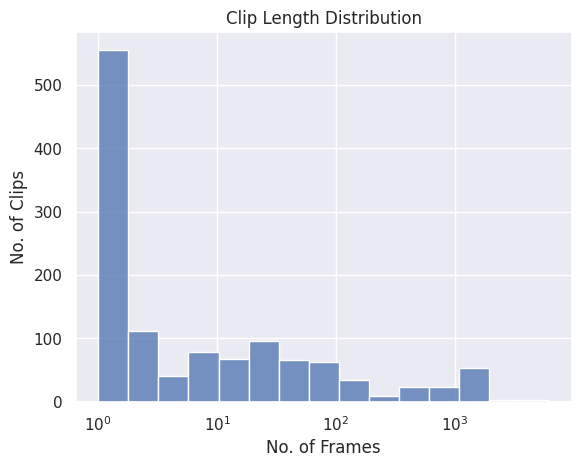

In [44]:
import seaborn as sns

sns.set_theme()

# Compute clip lengths for a single camera.
camera0 = metadata[metadata["camera"] == 0]
by_clip = camera0.groupby("clip")
clip_lengths = by_clip.size()

plot = sns.histplot(data=clip_lengths, log_scale=True)
plot.set(title="Clip Length Distribution", xlabel="No. of Frames", ylabel="No. of Clips")
clip_lengths

In [60]:
long_clips = clip_lengths[clip_lengths > 50]
long_metadata = metadata[metadata["clip"].isin(long_clips.index)]
long_metadata

,clip,frame_num,camera,file_id
0,0,250,0,clip0_cam0_frame250
1,0,250,1,clip0_cam1_frame250
2,0,250,2,clip0_cam2_frame250
3,0,255,0,clip0_cam0_frame255
4,0,255,1,clip0_cam1_frame255
...,...,...,...,...
430147,1246,2771,1,clip1246_cam1_frame2771
430148,1246,2771,2,clip1246_cam2_frame2771
430149,1246,2775,0,clip1246_cam0_frame2775
430150,1246,2775,1,clip1246_cam1_frame2775


In [65]:
metadata_indexed = long_metadata.set_index(["clip", "frame_num", "camera"])
metadata_indexed

file_id 
 
 
 clip 
 frame_num 
 camera 
 
 
 
 
 
 0 
 250 
 0 
 clip0_cam0_frame250 
 
 
 1 
 clip0_cam1_frame250 
 
 
 2 
 clip0_cam2_frame250 
 
 
 255 
 0 
 clip0_cam0_frame255 
 
 
 1 
 clip0_cam1_frame255 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 1246 
 2771 
 1 
 clip1246_cam1_frame2771 
 
 
 2 
 clip1246_cam2_frame2771 
 
 
 2775 
 0 
 clip1246_cam0_frame2775 
 
 
 1 
 clip1246_cam1_frame2775 
 
 
 2 
 clip1246_cam2_frame2775 
 
 
 
 408075 rows × 1 columns

In [76]:
import random

anchor_index = random.randint(0, len(metadata_indexed))
anchor_row = metadata_indexed.iloc[anchor_index]

anchor_clip, _, _ = anchor_row.name
clip_frames = metadata_indexed.loc[anchor_clip]
clip_frames

file_id 
 
 
 frame_num 
 camera 
 
 
 
 
 
 5 
 0 
 clip1046_cam0_frame5 
 
 
 1 
 clip1046_cam1_frame5 
 
 
 2 
 clip1046_cam2_frame5 
 
 
 7 
 0 
 clip1046_cam0_frame7 
 
 
 1 
 clip1046_cam1_frame7 
 
 
 ... 
 ... 
 ... 
 
 
 2951 
 1 
 clip1046_cam1_frame2951 
 
 
 2 
 clip1046_cam2_frame2951 
 
 
 2954 
 0 
 clip1046_cam0_frame2954 
 
 
 1 
 clip1046_cam1_frame2954 
 
 
 2 
 clip1046_cam2_frame2954 
 
 
 
 5772 rows × 1 columns

In [77]:
clip_frames.iloc[7000]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /run/shm/ipykernel_246503/3808375516.py:1 in <module>                                            │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/run/shm/ipykernel_246503/3808375516.py'                   │
│                                                                                                  │
│ /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-packages/pandas/core/indexing │
│ .py:1074 in __getitem__                                                                          │
│                                                                                                  │
│   1071 │   │   │   axis = self.axis or 0                                                         │
│   1072 │   │   │                                                                                 │
│   1073 │   │   │   maybe_callable = com.apply_if_callable(key, self.obj)                         │
│ ❱ 1074 │   │   │   return self._getitem_axis(maybe_callable, axis=axis)                          │
│   1075 │                                                                                         │
│   1076 │   def _is_scalar_access(self, key: tuple):                                              │
│   1077 │   │   raise NotImplementedError()                                                       │
│                                                                                                  │
│ /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-packages/pandas/core/indexing │
│ .py:1626 in _getitem_axis                                                                        │
│                                                                                                  │
│   1623 │   │   │   │   raise TypeError("Cannot index by location index with a non-integer key")  │
│   1624 │   │   │                                                                                 │
│   1625 │   │   │   # validate the location                                                       │
│ ❱ 1626 │   │   │   self._validate_integer(key, axis)                                             │
│   1627 │   │   │                                                                                 │
│   1628 │   │   │   return self.obj._ixs(key, axis=axis)                                          │
│   1629                                                                                           │
│                                                                                                  │
│ /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-packages/pandas/core/indexing │
│ .py:1558 in _validate_integer                                                                    │
│                                                                                                  │
│   1555 │   │   """                                                                               │
│   1556 │   │   len_axis = len(self.obj._get_axis(axis))                                          │
│   1557 │   │   if key >= len_axis or key < -len_axis:                                            │
│ ❱ 1558 │   │   │   raise IndexError("single positional indexer is out-of-bounds")                │
│   1559 │                                                                                         │
│   1560 │   # -------------------------------------------------------------------                 │
│   1561                                                                                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
IndexError: single positional indexer is out-of-bounds